In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("Cars.csv")

In [3]:
data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


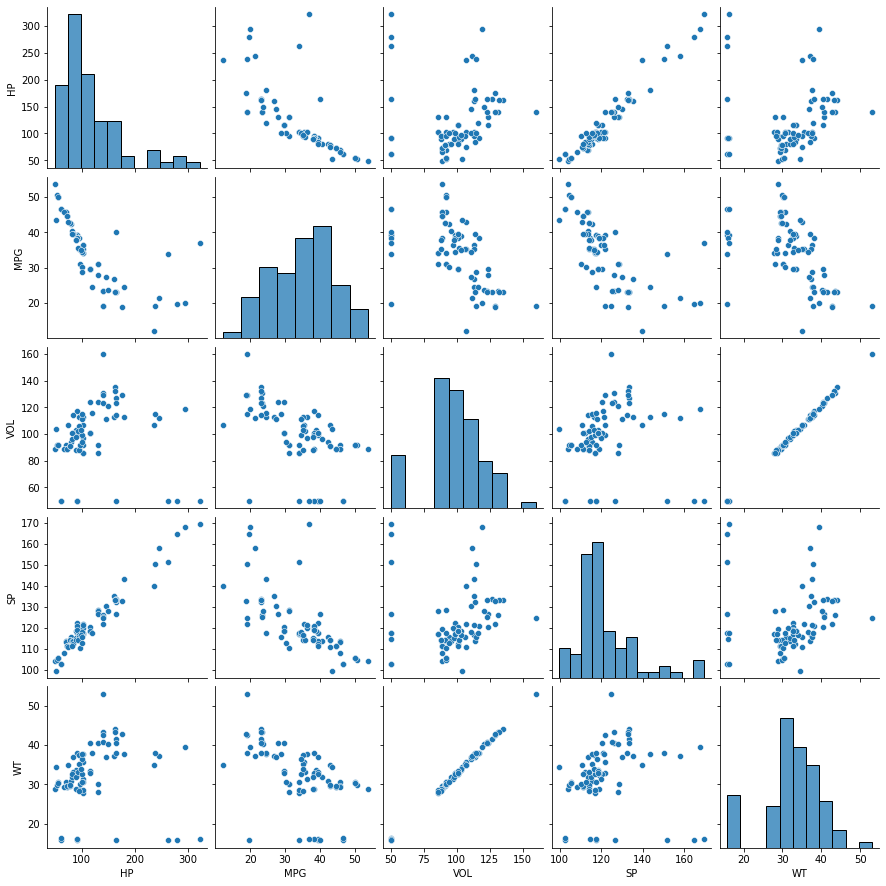

In [13]:
sns.pairplot(data)

In [6]:
model=smf.ols('MPG~ WT+SP+VOL+HP',data=data).fit()

In [7]:
model.params

Intercept    30.677336
WT            0.400574
SP            0.395627
VOL          -0.336051
HP           -0.205444
dtype: float64

In [8]:
model.tvalues, '\n', model.pvalues

(Intercept    2.058841
 WT           0.236541
 SP           2.499880
 VOL         -0.590970
 HP          -5.238735
 dtype: float64,
 '\n',
 Intercept    0.042936
 WT           0.813649
 SP           0.014579
 VOL          0.556294
 HP           0.000001
 dtype: float64)

In [9]:
model.rsquared, model.rsquared_adj

(0.7705372737359844, 0.7584602881431415)

In [10]:
mwt= smf.ols('MPG~WT',data= data).fit()
mwt.tvalues, mwt.pvalues

(Intercept    14.248923
 WT           -5.508067
 dtype: float64,
 Intercept    1.550788e-23
 WT           4.383467e-07
 dtype: float64)

In [11]:
mwt= smf.ols('MPG~SP',data= data).fit()
mwt.tvalues, mwt.pvalues

(Intercept    13.695100
 SP           -8.406007
 dtype: float64,
 Intercept    1.457105e-22
 SP           1.407325e-12
 dtype: float64)

In [12]:
mwt= smf.ols('MPG~VOL',data= data).fit()
mwt.tvalues, mwt.pvalues

(Intercept    14.106056
 VOL          -5.541400
 dtype: float64,
 Intercept    2.753815e-23
 VOL          3.822819e-07
 dtype: float64)

In [13]:
mwt= smf.ols('MPG~HP',data= data).fit()
mwt.tvalues, mwt.pvalues

(Intercept    29.722460
 HP           -9.357053
 dtype: float64,
 Intercept    1.211037e-44
 HP           1.956490e-14
 dtype: float64)

In [14]:
rsqwt=smf.ols('WT~SP+VOL+HP',data=data).fit().rsquared
vifwt= 1/(1-rsqwt)

In [15]:
rsqsp=smf.ols('SP~WT+VOL+HP',data=data).fit().rsquared
vifsp= 1/(1-rsqwt)

In [16]:
rsqvol=smf.ols('VOL~SP+WT+HP',data=data).fit().rsquared
vifvol= 1/(1-rsqwt)

In [17]:
rsqhp=smf.ols('HP~SP+VOL+WT',data=data).fit().rsquared
vifhp= 1/(1-rsqwt)

In [18]:
d1={'VARIABLE':['WT','SP','VOL','HP'],'VIF':[vifwt,vifsp,vifvol,vifhp]}

In [19]:
vifdf=pd.DataFrame(d1)

In [20]:
vifdf

,VARIABLE,VIF
0,WT,639.533818
1,SP,639.533818
2,VOL,639.533818
3,HP,639.533818


In [21]:
import statsmodels.api as sm

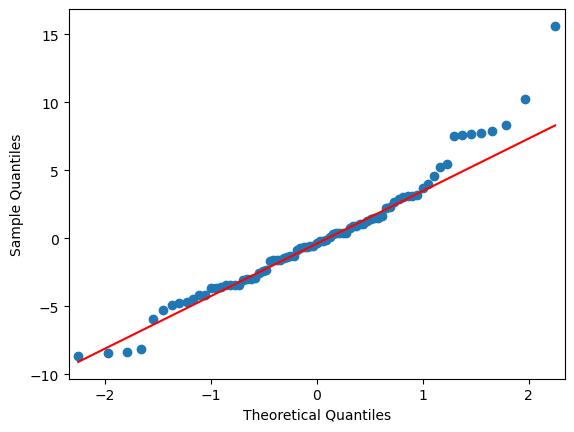

In [22]:
qqplot=sm.qqplot(model.resid,line='q')

In [23]:
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

In [24]:
def get_standardized_values (vals):
    return (vals - vals.mean())/vals.std()

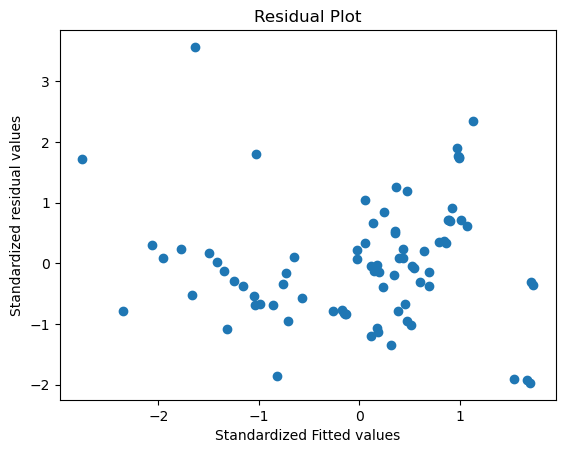

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


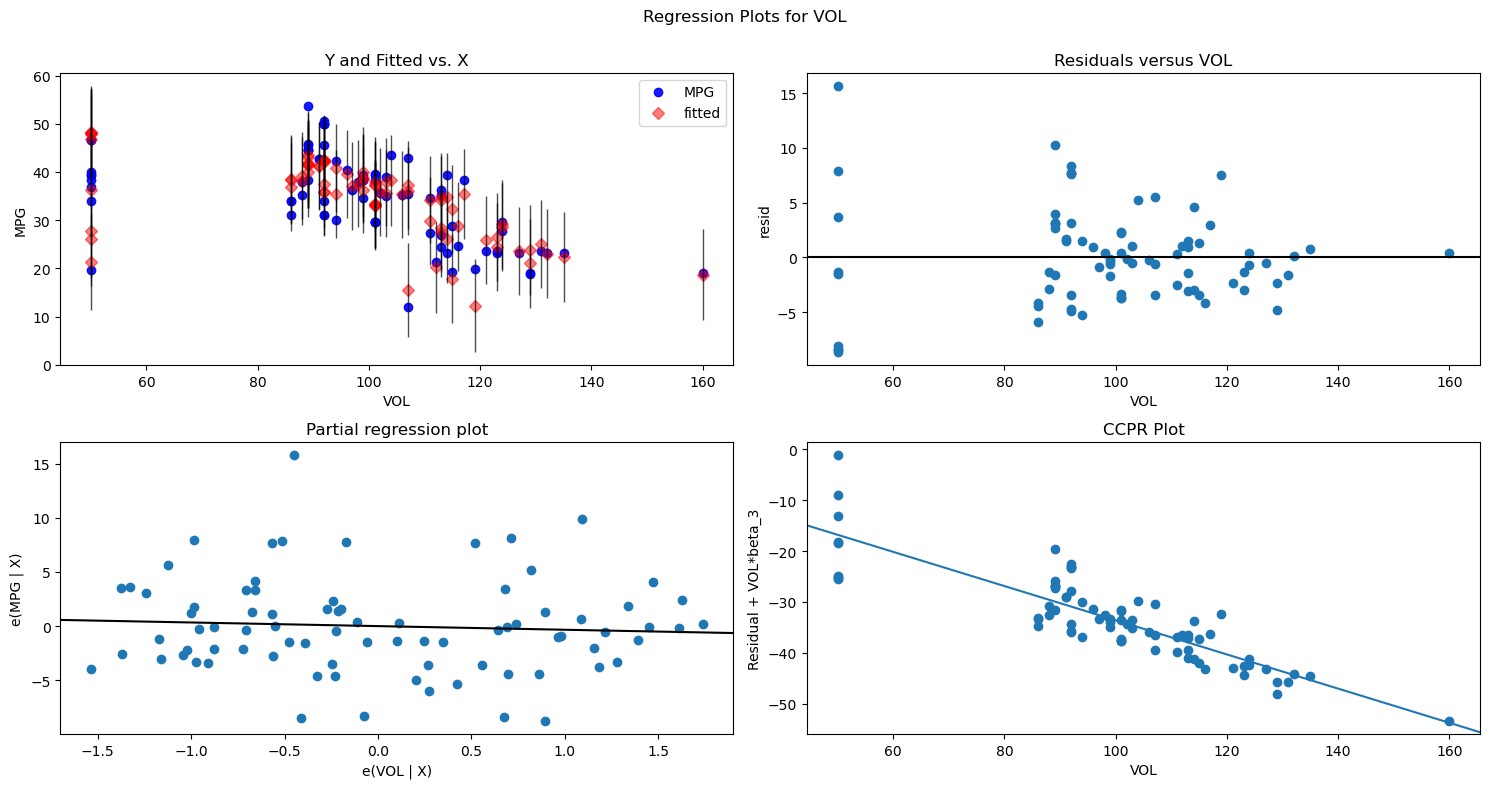

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

eval_env: 1


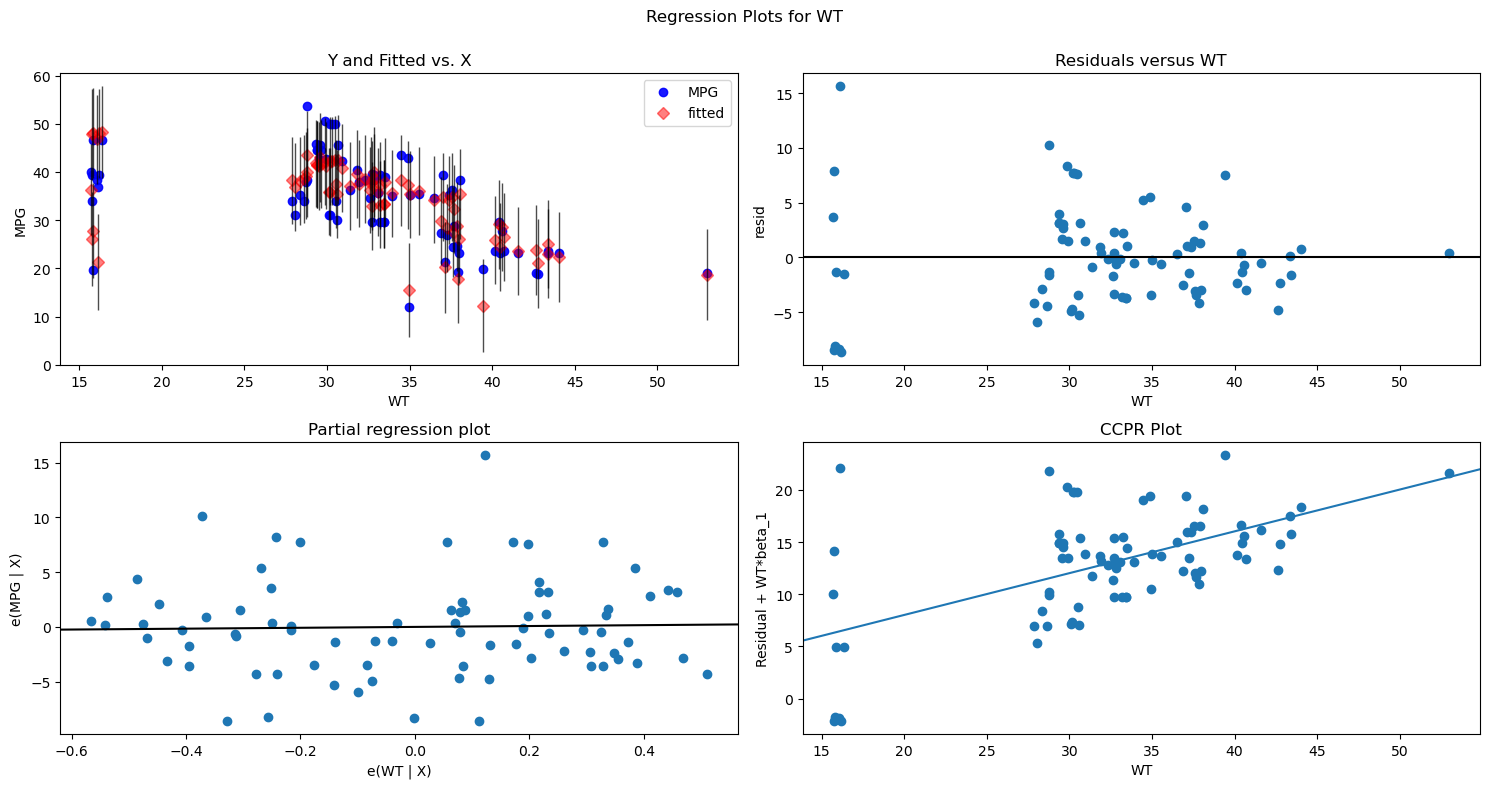

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

eval_env: 1


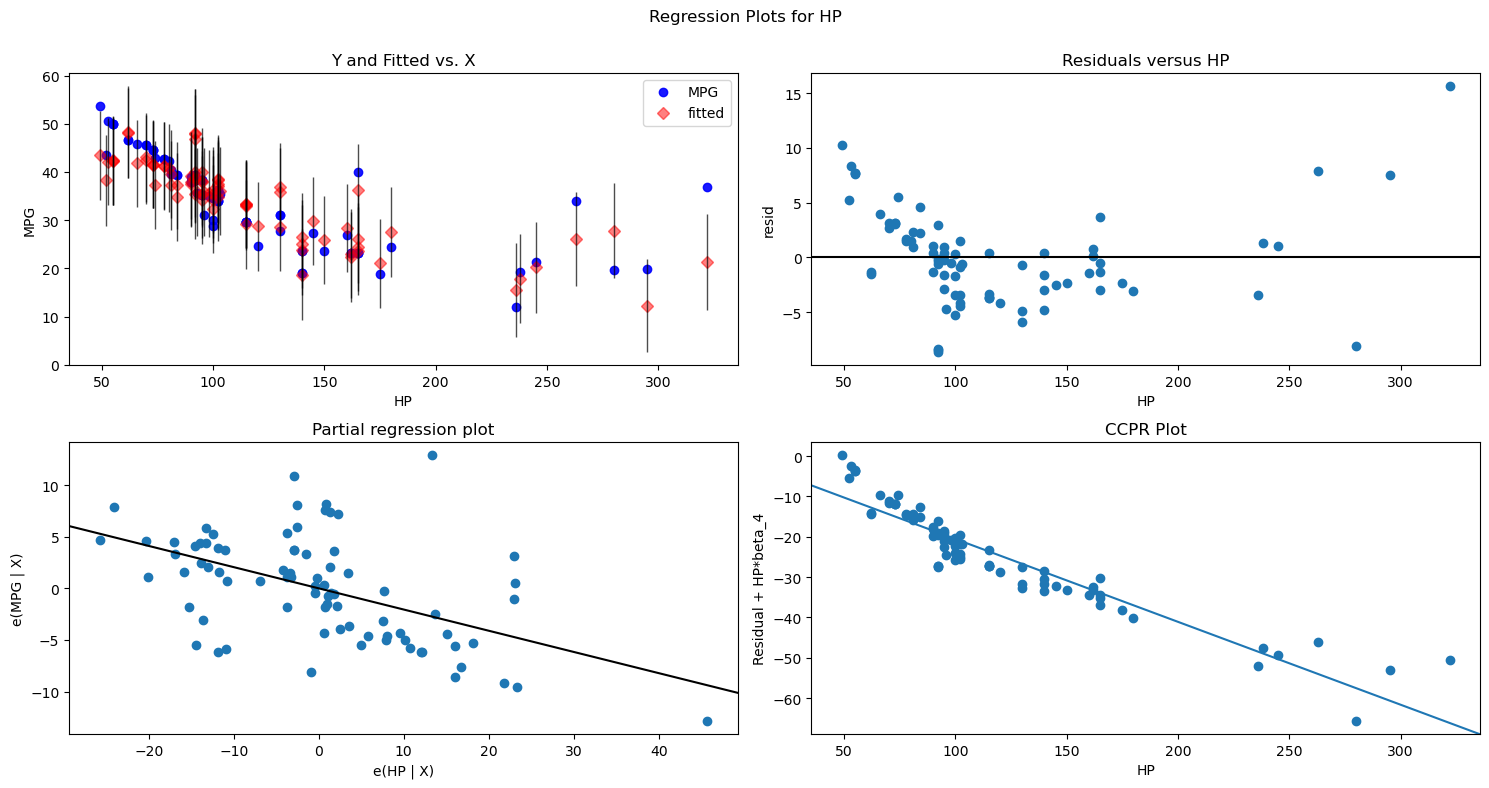

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


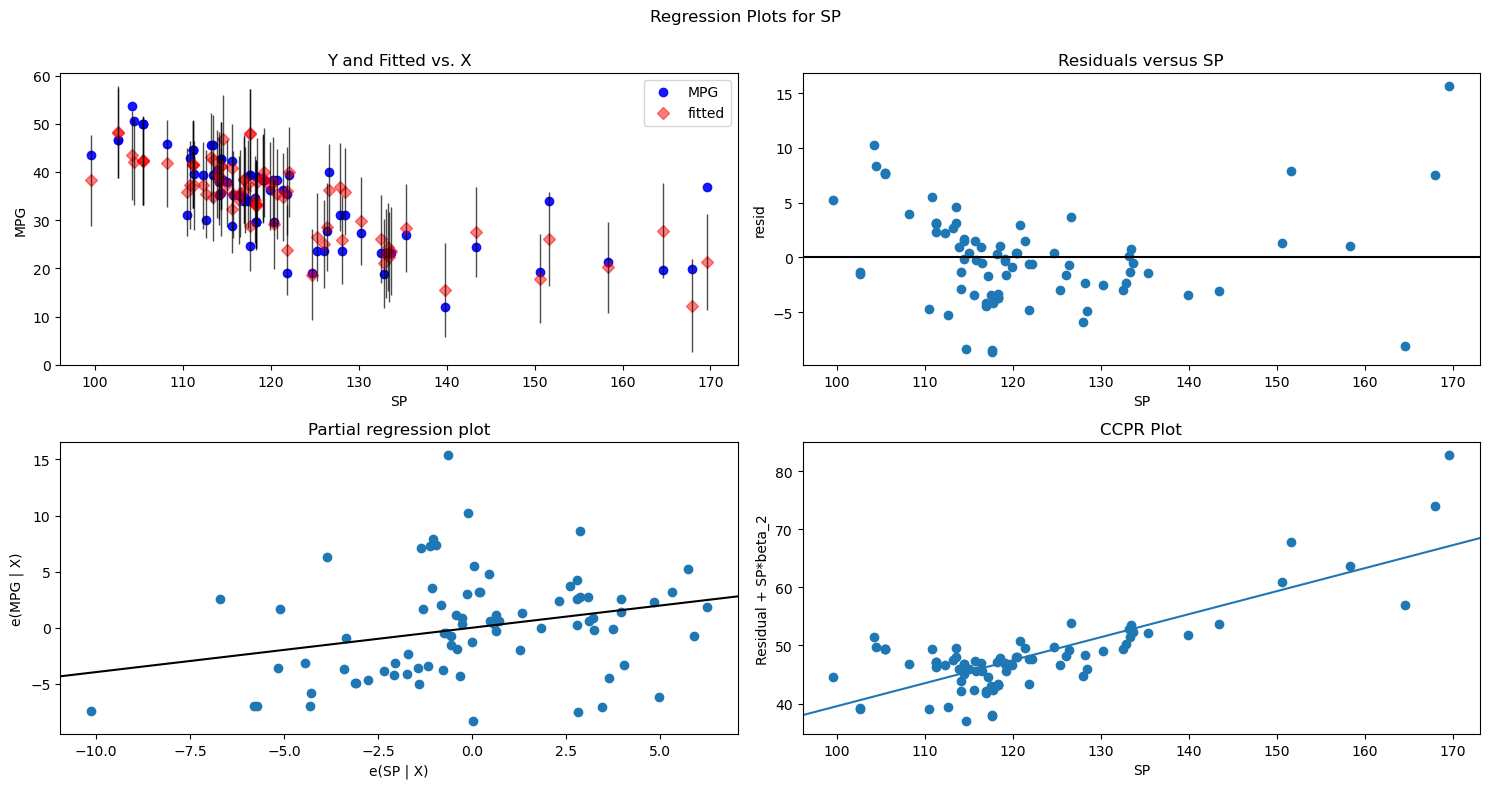

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

In [30]:
model_influence=model.get_influence()
(c,_)= model_influence.cooks_distance

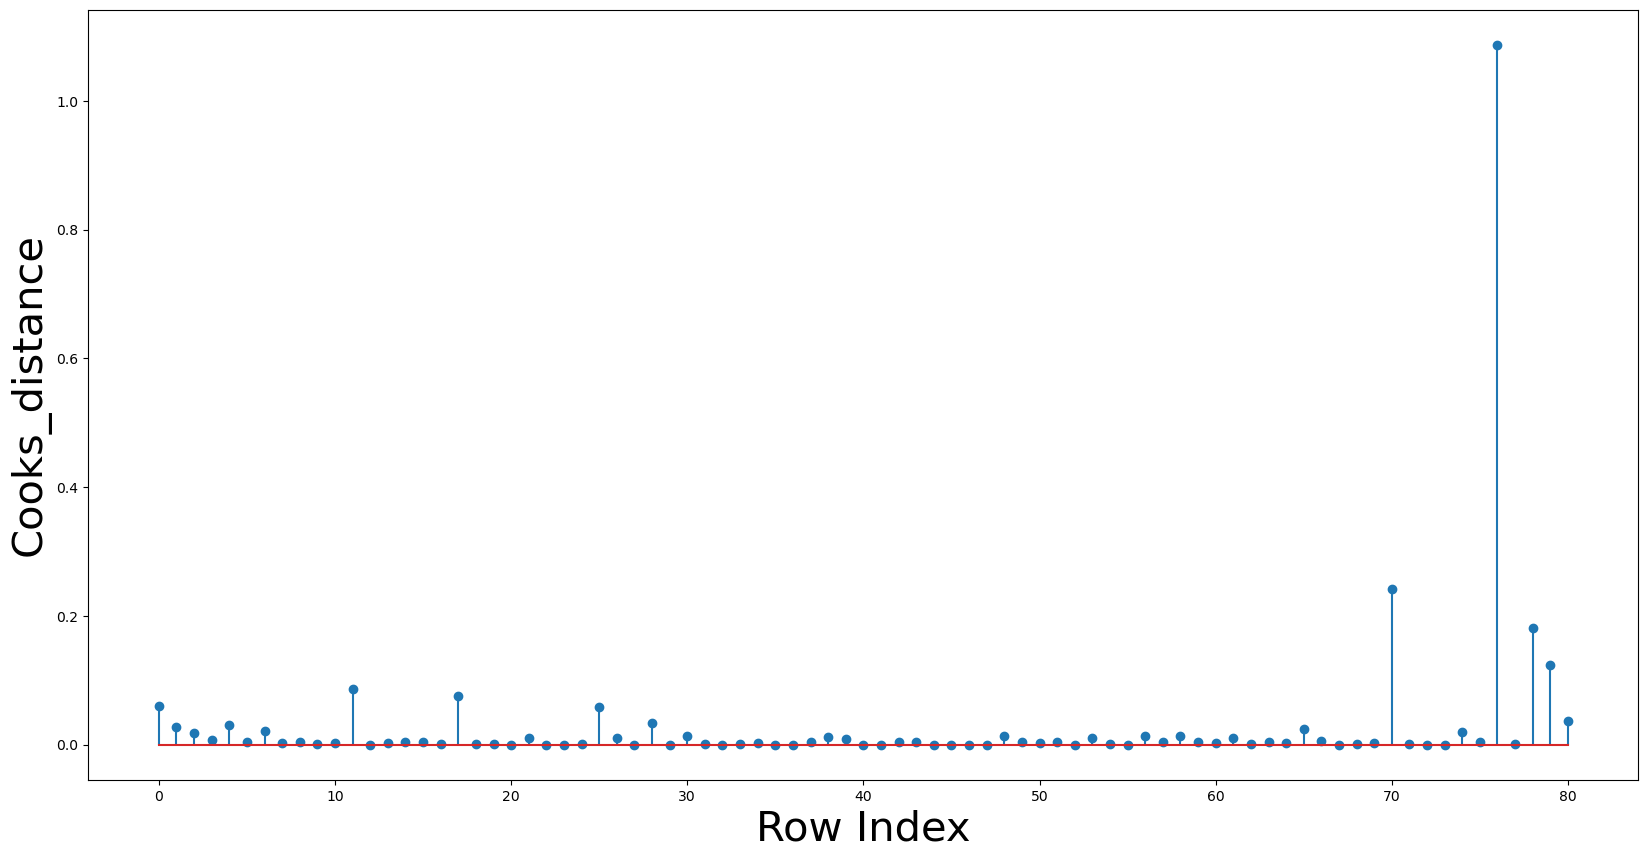

In [31]:
fig=plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(data)),np.round(c, 3))
plt.xlabel("Row Index",size='30')
plt.ylabel('Cooks_distance',size='30')

plt.show()

In [32]:
(np.argmax(c),np.max(c))

(76, 1.0865193998179925)

In [33]:
from statsmodels.graphics.regressionplots import  influence_plot

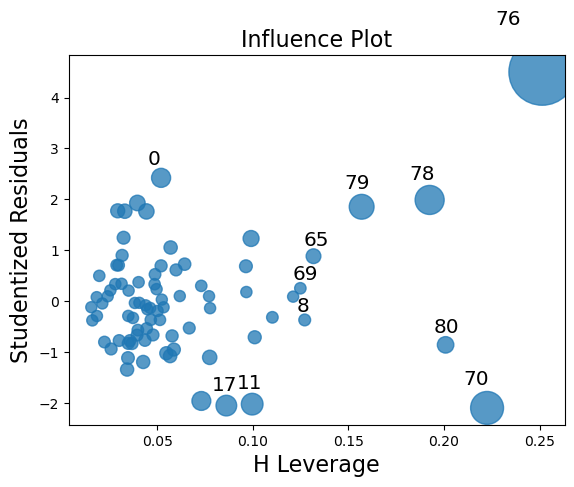

In [35]:
influence_plot(model)
plt.show()

In [36]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

NameError: name 'cars' is not defined

In [ ]:
leverage_cutoff 

In [ ]:
data[data.index.isin([70,76])]

In [37]:
cars=pd.read_csv('Cars.csv')

In [38]:
cars=cars.drop(cars.index[[70,76]],axis=0).reset_index()

In [39]:
cars=cars.drop(['index'],axis=1)

In [40]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [41]:
finalwt=smf.ols('MPG~WT+SP+HP',data=cars).fit()
finalwt.rsquared, finalwt.aic

(0.8160034320495304, 446.18843235750313)

In [42]:
final_ml_V=smf.ols('MPG~VOL+SP+HP',data=cars).fit()
final_ml_V.rsquared, final_ml_V.aic

(0.8161692010376008, 446.1172263944772)

In [43]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

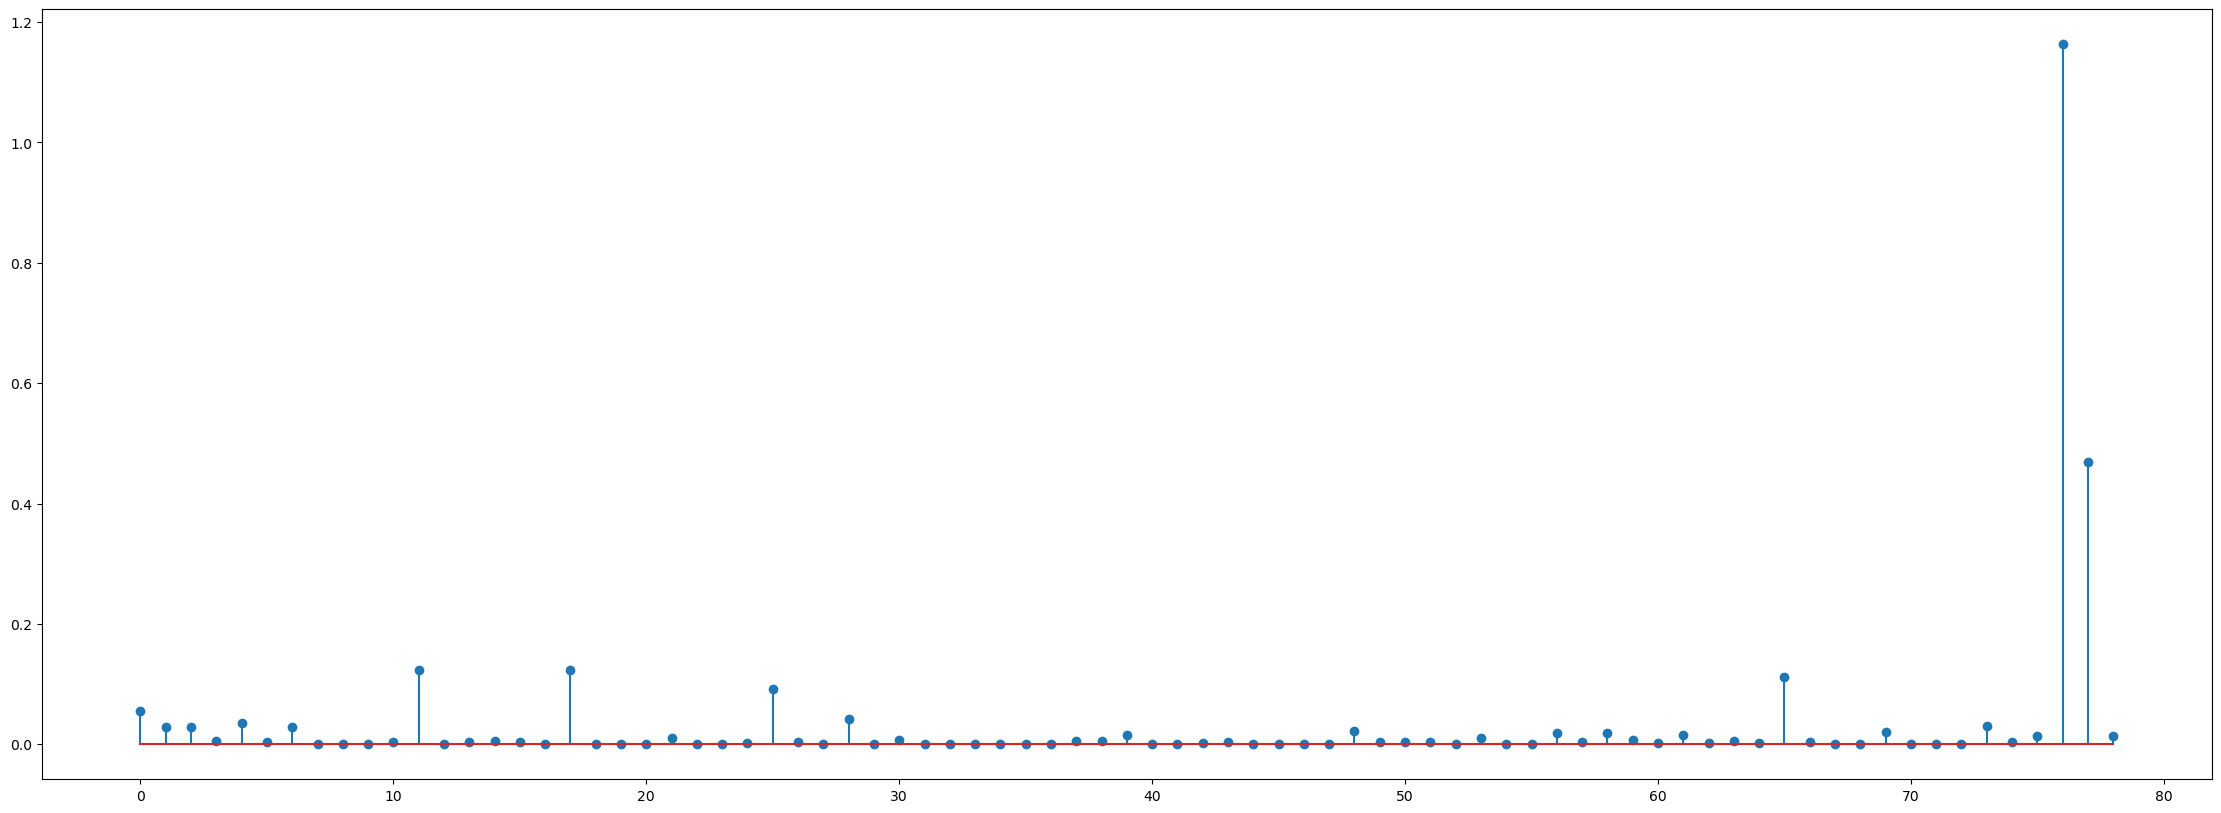

In [44]:
fig=plt.figure(figsize=(28,10))
plt.stem(np.arange(len(cars)),np.round(c_V,3))
plt.show()

In [45]:
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135182)

In [46]:
cars[cars.index.isin([76])]

,HP,MPG,VOL,SP,WT
76,263,34.0,50,151.598513,15.769625


In [47]:
cars1=cars.drop(cars.index[[76,77]],axis=0)

In [48]:
cars1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [49]:
cars2=cars1.reset_index()

In [50]:
car4=cars2.drop(['index'],axis=1)

In [51]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [52]:
finalmodel=smf.ols('MPG~VOL+SP+HP',data=car4).fit()

In [53]:
influencev=finalmodel.get_influence()
(c_v,_)=influencev.cooks_distance

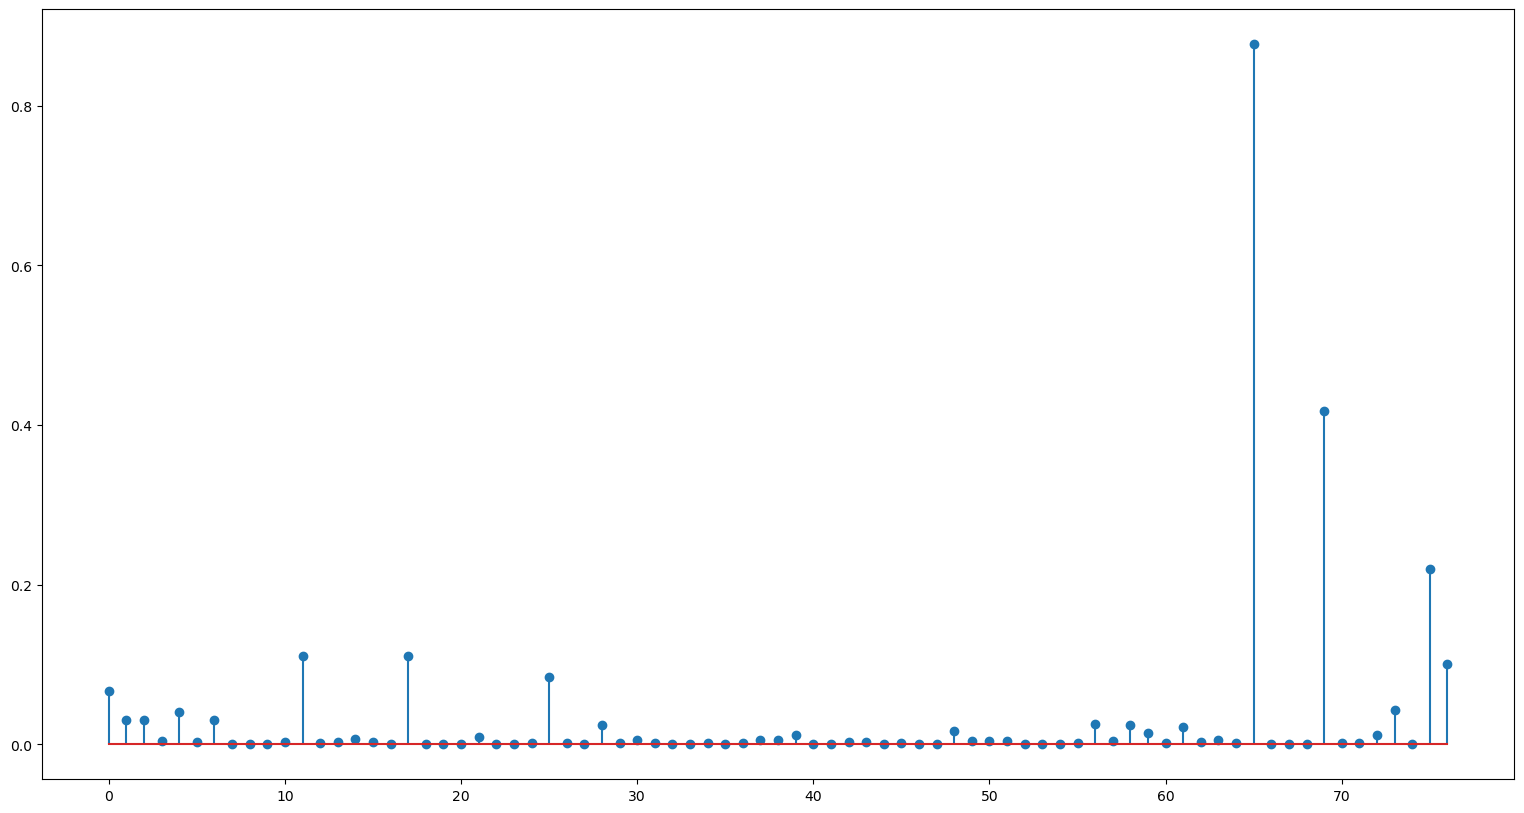

In [54]:
fig=plt.subplots(figsize=(19,10))
plt.stem(np.arange(len(car4)),np.round(c_v,3));
plt.show()

In [55]:
(np.argmax(c_v),np.max(c_v))

(65, 0.8774556986296674)

In [56]:
newdata=pd.DataFrame({'HP':50,'SP':78,'VOL':68,'WT':89},index=[1])

In [57]:
newdata

,HP,SP,VOL,WT
1,50,78,68,89


In [58]:
finalmodel.predict(newdata)

1    36.674194
dtype: float64

In [59]:
finalmodel.predict(cars.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [60]:
ypredict=finalmodel.predict(cars)

In [61]:
ypredict

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
74    19.212878
75    12.198598
76    14.908588
77     4.163958
78     9.161202
Length: 79, dtype: float64

In [62]:
mearg=pd.merge(cars,ypredict)

ValueError: Cannot merge a Series without a name